# Exercsise 2

Author:
- Nicola Dal Cin
- Giulio Vicentini

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse.linalg

**Program the central finite difference method for
\begin{equation}
    (b(x)u_x)_x - \gamma(x)u = f(x)
\end{equation}
using a uniform grid and the central finite difference method
\begin{equation}
   \frac{\beta_{i+1/2}\frac{U_{i+1}-U_i}{h}-\beta_{i-1/2}\frac{U_{i}-U_{i-1}}{h}}{h}-\gamma_iU_i = f_i
\end{equation}**

**- test your code for the case
\begin{equation}
    \beta(x)=1+x^2 \qquad \gamma(x)=x \qquad a=2 \qquad b=-3
\end{equation}
and the other function or paramters are determined by the exact solution
\begin{equation}
    u(x)=e^{-x}(x-1)^2
\end{equation}**

**- Plot the computed solution and the exact solution, and the error
for a particular grid $n = 100$**

We want to program the central finite difference method for 
\begin{equation}
\begin{cases}
    (\beta(x)u_x)_x-\gamma(x)u=f(x), \quad x \in (0,1)\\
    au(1)+bu_x(1)=c,\\
    u(0)=1;
\end{cases}
\end{equation}
using a uniform grid and the central finite difference scheme
\begin{equation}
    \frac{\beta_{i+\frac{1}{2}}\frac{U_{i+1}-U_i}{h}-\beta_{i-\frac{1}{2}}\frac{U_{i}-U_{i-1}}{h}}{h}-\gamma_iU_i=f_i,
    \label{cfds2}
\end{equation}
that is first order accurate on $h$.

Let's, as usual, divide the domain $[0,1]$ in $N+1$ sub--intervals of length $h:=\frac{1}{N+1}$ and having endpoints $x_i:=i \cdot h$, with $i \in \{0, \dots, N+1 \}$. Then, we set 
\begin{equation}
    U_i \approx u_i:=u(x_i), \quad \gamma_i:=\gamma(x_i), \quad f_i:=f(x_i) \quad \text{and} \quad \beta_{i \pm \frac{1}{2}}:=\beta(x_i \pm h/2)=\beta((i\pm 1/2)h).
\end{equation}
Using \eqref{cfds2} we can define a set of $N+2$ linear conditions to determine the $U_i$'s. Rearranging the terms, for $1\leq i \leq N$, we have
\begin{equation}
   \beta_{i+\frac{1}{2}} U_{i+1}-(\beta_{i+\frac{1}{2}}+\beta_{i-\frac{1}{2}}+h^2\gamma_i)U_i+\beta_{i-\frac{1}{2}}U_{i-1}=h^2f_i.
   \label{2cond}
\end{equation}

Moreover, from the boundary condition we have $U_0 \approx u(0)=1$ and --- using the first order approximation $U_{N+1}'=(U_{N+1}-U_N)/h$ for the first derivative --- we get
$$    c = a \, U_{N+1} + b \frac{U_{N+1}-U_N}{h} = \biggl(a+\frac{b}{h}\biggr)U_{N+1}-\frac{b}{h}U_N. 
$$

The conditions \eqref{2cond} and \eqref{bond2} (with $U_0=1$) determine a linear system of $N+2$ equations with $N+2$ unknowns $AU=F$, where $U=(U_0, U_1, \dots, U_{N+1})^t$, $F=(1, h^2f_1, \dots, h^2f_N,c)^t$ and $A$ determined by the above equations.

The system has a solution which is unique if and only if the matrix $A$ has rank $N+2$; note that a necessary condition is that at least one between $a$ and $b$ must be nonzero. 


  \item In the particular case in which 
  \begin{equation}
      \beta(x)=1+x^2, \quad \gamma(x)=x, \quad a = 2 \quad \text{and} \quad b=-3,
  \end{equation}
  and the exact solution is $u(x)=e^{-x}(x-1)^2.$ It's straightforward, since $u$ has a zero of second degree in $x=1$, that $u'(1)=0$ and so $c=0$. Moreover, computing the derivatives one finds that in this case
  \begin{equation}
      f(x)=e^{-x}(x^4-9x^3+18x^2-13x+7).
  \end{equation}

Implementing the above method one finds the following graph, using $N$=100, for the approximated solution.
    
Finally, the approximation error of the solution is
    \begin{equation}
      e:=(U_0-u(x_0), \dots , U_j - u(x_j), \dots, U_{N+1}- u(x_{N+1}))^t
    \end{equation}
    and in this case
    \begin{equation}
        \| u \|_\infty = \max_{i=0,\dots,N+1} |U_j - u(x_j)|\approx 0.03326.
    \end{equation}


In [ ]:
def change_param(a, b):
    # domain
    xmin = 0
    xmax = 1

    #exact solution
    def u(x):
      return np.exp(-x)*(x-1)**2

    #initial conditions
    def beta(x):
        return 1+x**2

    def gamma(x):
        return x

    a = a #2
    b = b #-3
    c = 0

    def f(x):
        return np.exp(-x)*(x**4-9*x**3+18*x**2-13*x+7)


    #equally spaced grid (N+1 intervals)
    N = 99
    h = 1/(N+1)

    # matrix A
    A = np.zeros((N+2, N+2))
    A[0,0] = 1
    A[N+1, N] = -b/h
    A[N+1,N+1]=a+b/h
    for i in range(1, N+1):
        A[i, i-1] = beta((i-0.5)*h)
        A[i, i] = -( beta((i-0.5)*h) + beta((i+0.5)*h) + h**2*gamma(i*h) )
        A[i, i+1] = beta((i+0.5)*h)
    #print(A)

    # vector F
    F = np.zeros(N+2)
    for i in range(1,N+1):
      F[i] = f(i*h)*h**2
    F[0] = 1
    F[N+1] = c
    #print(F)

    #solve the linear system and get approximated solution u       
    U = np.linalg.solve(A, F)

    ### This could be done more efficiently, since the matrix is tridiagonal, 
    ### without inverting it, but instead using this O(n) algorithm: https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm

    #plot the graph of the approximated function
    x = np.linspace(xmin, xmax, N+2)

    plt.figure(figsize=(10,8))
    plt.plot(x, U, label='approximated solution')
    plt.plot(x, u(x), label='exact solution')
    #plt.plot(1, 1, 'ro')
    plt.xlabel('x')
    plt.ylabel('Approximated solution U(x)')
    plt.legend()
    plt.show()

    #"exact" solution in the point of the grid
    y = np.zeros(N+2)
    for i in range(0,N+2):
      y[i] = u(i*h)

    #Approximation error
    e = U-y
    #print(e)

    plt.figure(figsize=(10,8))
    plt.plot(x, e)
    plt.xlabel('x')
    plt.ylabel('error')
    plt.show()

    print("The sup norm of the approximation error is ", np.max(np.absolute(e)))

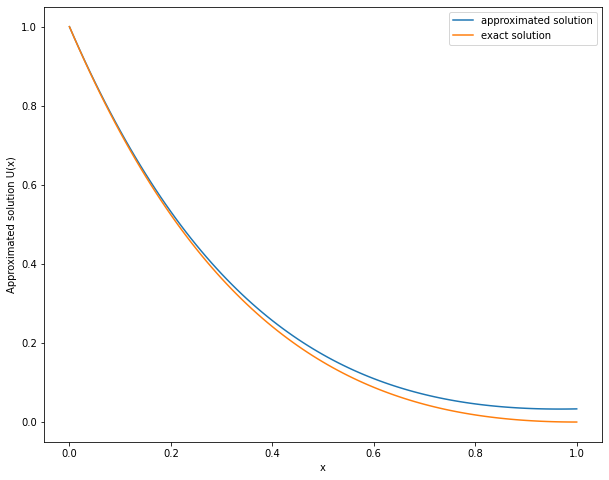

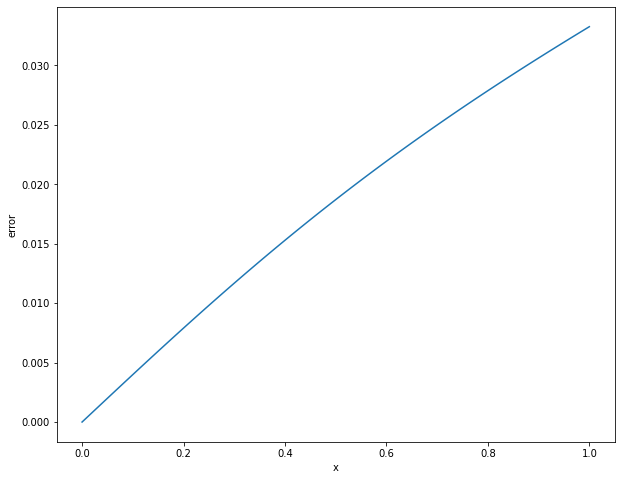

The sup norm of the approximation error is  0.03325882170363616


In [ ]:
change_param(2, -3)

**- Can your code handle the case when a = 0 or b = 0?**

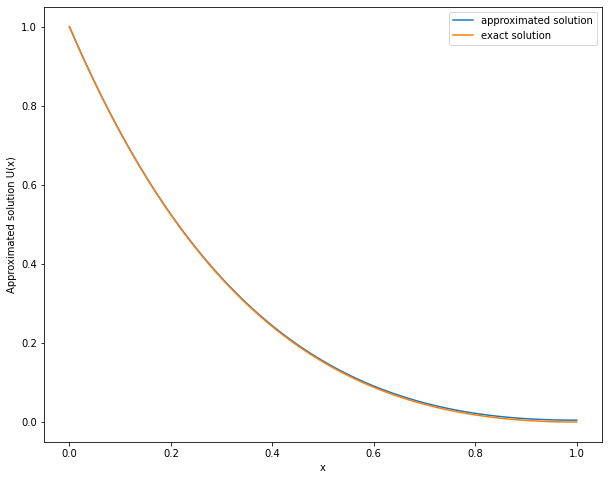

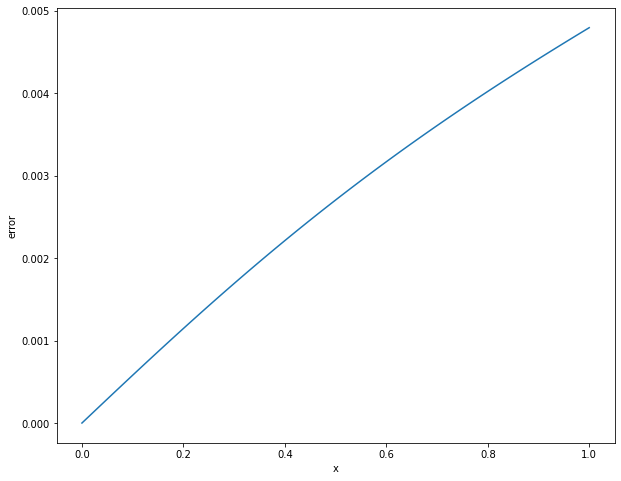

The sup norm of the approximation error is  0.004792187097565355


In [ ]:
change_param(0, -3)

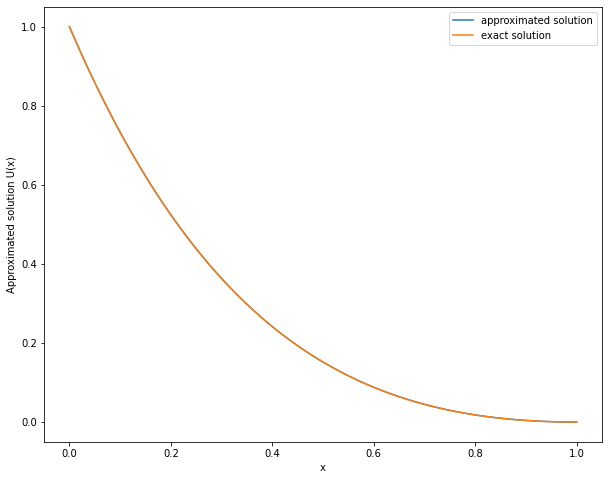

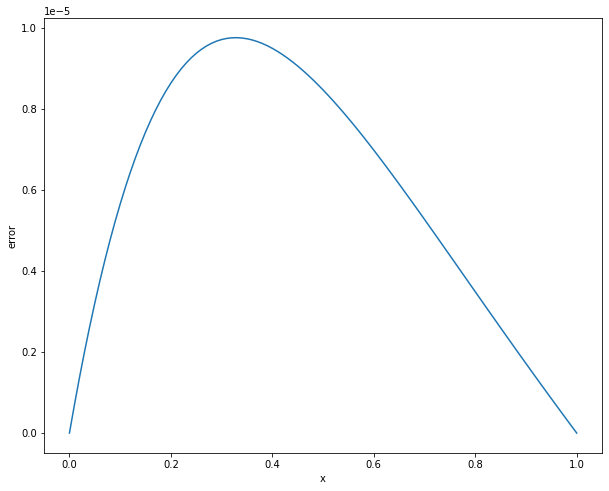

The sup norm of the approximation error is  9.765841620379412e-06


In [ ]:
change_param(2, 0)

If the parameters a and b are both zero, the system matrix A will be singular and the code can not handle such a situation.

**-If the central finite difference scheme is used for the equivalent
differential equation
\begin{equation*}
    \beta u'' + \beta' u' - \gamma(x)u = f(x)
\end{equation*}
what are the advantages or disadvantages?**

The central difference scheme used for this numerical solution is of first order, Since we use forward and backward difference to approximate the derivatives of our differential equation:
\begin{equation*}
    (\beta(x)u_x)_x-\gamma(x)u = f(x)
\end{equation*}
the central difference scheme used for this numerical solution is of first order. \\
On the other hand, if we use the same scheme for the equivalent differential equation
\begin{equation*}
    \beta u'' + \beta' u' - \gamma(x)u = f(x)
\end{equation*}
A disadvantage would be that more calculations would be needed since the method is more complex, as a matter of fact the derivatives could be approximated with second order accuracy. 